# CNN on MNIST

In [78]:
# !pip uninstall tensorflow
# !pip install tensorflow==2.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
sns.set_theme()

## Data Preprocessing -- Part 1

In [79]:
from tensorflow.keras.datasets import mnist

In [80]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [81]:
X_train.shape

(60000, 28, 28)

In [82]:
single_image = X_train[0]

In [83]:
single_image.shape

(28, 28)

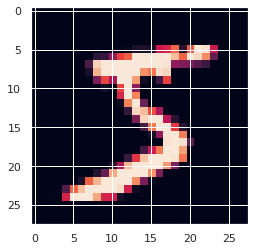

In [84]:
plt.imshow(single_image)

In [85]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Converting labels to Category

In [86]:
from tensorflow.keras.utils import to_categorical

In [87]:
y_example = to_categorical(y_train)

In [88]:
y_example.shape

(60000, 10)

In [89]:
y_cat_test = to_categorical(y_test, num_classes = 10)
y_cat_train = to_categorical(y_train, num_classes = 10)

### Scaling the Data

In [90]:
single_image.max()

255

In [91]:
single_image.min()

0

In [92]:
X_train = X_train / 255
X_test = X_test / 255

In [93]:
scaled_image = X_train[0]

In [94]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

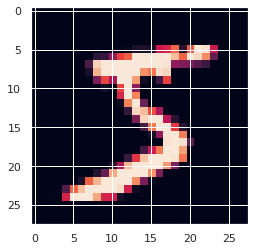

In [95]:
plt.imshow(scaled_image)

### Adding a Dimension
**(So we can tell CNN that we are dealing single RGB or color channel)**

In [96]:
# batch_size, width, height, color_channels
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

## Creating a Model -- Part 2

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [98]:
model = Sequential()


model.add(Conv2D(filters = 32, kernel_size = (4, 4), strides = (1, 1), padding = 'valid', input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

### keras.io/metrics

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [99]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 4608)              0         
                                                                 
 dense_15 (Dense)            (None, 128)               589952    
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_______________________________________________

In [100]:
from tensorflow.keras.callbacks import EarlyStopping

In [101]:
earlystop = EarlyStopping(monitor = "val_loss", patience = 1)

In [102]:
model.fit(X_train, y_cat_train, epochs = 10, validation_data = (X_test, y_cat_test), callbacks = [earlystop])

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1346 - accuracy: 0.9603 - val_loss: 0.0589 - val_accuracy: 0.9805
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0378 - val_accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0459 - val_accuracy: 0.9859


## Model Evaluation -- Part 3

In [103]:
metrics = pd.DataFrame(model.history.history)

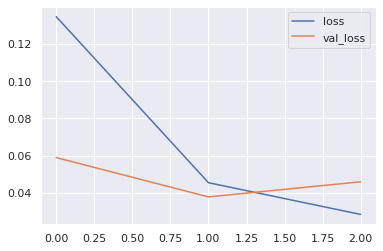

In [104]:
metrics[['loss', 'val_loss']].plot()

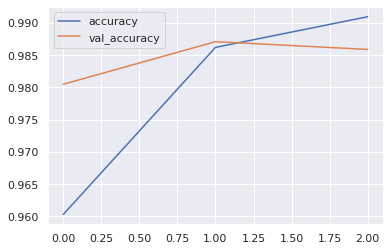

In [105]:
metrics[['accuracy', 'val_accuracy']].plot()

In [106]:
model.metrics_names

['loss', 'accuracy']

In [107]:
model.evaluate(X_test, y_cat_test, verbose = 0)

[0.045940935611724854, 0.9858999848365784]

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

In [109]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [110]:
predictions = np.argmax(predictions, axis = 1)

In [111]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       1.00      0.96      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.96      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [112]:
confusion_matrix(y_test, predictions)

array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1133,    1,    0,    0,    0,    0,    0,    1,    0],
       [   0,    0, 1025,    0,    0,    0,    0,    4,    3,    0],
       [   0,    0,    3, 1002,    0,    1,    0,    0,    4,    0],
       [   1,    0,    3,    0,  963,    0,    3,    0,    2,   10],
       [   2,    0,    0,   12,    0,  854,    7,    0,   15,    2],
       [   9,    4,    0,    0,    3,    0,  939,    0,    3,    0],
       [   0,    1,   10,    1,    0,    0,    0, 1011,    1,    4],
       [   3,    0,    2,    0,    0,    0,    0,    1,  967,    1],
       [   0,    1,    3,    6,    2,    2,    0,    2,    6,  987]])

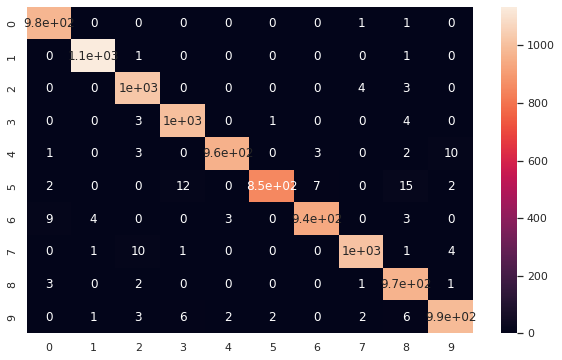

In [113]:
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

In [114]:
my_number = X_test[0]

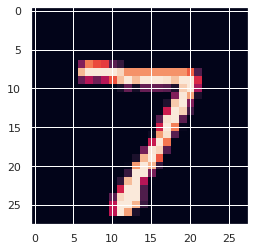

In [115]:
plt.imshow(my_number.reshape(28, 28))

In [116]:
np.argmax(model.predict(my_number.reshape(1, 28, 28, 1)))

1/1 [==============================] - 0s 19ms/step


7

## Let's decrease the parameters

### Approach 1

So my goal is to decrease **591,786 number of parameters** to some lower number while maintaining 98% accuracy.

In [117]:
from tensorflow.keras.layers import BatchNormalization

In [129]:
model1 = Sequential()


model1.add(Conv2D(filters = 32, kernel_size = (4, 4), strides = (1, 1), padding = 'valid', input_shape = (28, 28, 1), activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2, 2)))
model1.add(BatchNormalization())

model1.add(MaxPool2D(pool_size = (2, 2)))
model1.add(BatchNormalization())

model1.add(Conv2D(filters = 16, kernel_size = (2, 2), strides = (1, 1), padding = 'valid', activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2, 2)))
model1.add(BatchNormalization())

model1.add(Flatten())

model1.add(Dense(10, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_43 (Bat  (None, 12, 12, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 batch_normalization_44 (Bat  (None, 6, 6, 32)         128       
 chNormalization)                                    

In [130]:
model1.fit(X_train, y_cat_train, epochs = 10, validation_data = (X_test, y_cat_test), callbacks = [earlystop])

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2654 - accuracy: 0.9243 - val_loss: 0.0921 - val_accuracy: 0.9720
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0862 - accuracy: 0.9737 - val_loss: 0.0745 - val_accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0673 - accuracy: 0.9793 - val_loss: 0.0585 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0571 - accuracy: 0.9823 - val_loss: 0.0986 - val_accuracy: 0.9695


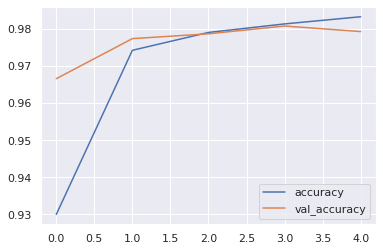

In [120]:
metrics = pd.DataFrame(model1.history.history)
metrics[['accuracy', 'val_accuracy']].plot()

In [121]:
model1.evaluate(X_test, y_cat_test, verbose = 0)

[0.06162537261843681, 0.9793000221252441]

Just by adding few more layers I was able to decrease the number of parameters from **591,786 to 3,418**, thats less than 1% of original parameters, amazing right?😏. Not to forget we maintain same accuracy. But I think we can do better. 


**Note:** It reached 98% accuracy at 3rd epoch, so with a callback we can save that state using `tensorflow.keras.callbacks.ModelCheckpoint`. But for the sake of simplicity I didn't.

### Approach 2

In [127]:
model2 = Sequential()


model2.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', input_shape = (28, 28, 1), activation = 'relu'))
model2.add(MaxPool2D(pool_size = (2, 2)))
model2.add(BatchNormalization())

model2.add(MaxPool2D(pool_size = (2, 2)))

model2.add(Conv2D(filters = 16, kernel_size = (2, 2), strides = (1, 1), padding = 'valid', activation = 'relu'))
model2.add(MaxPool2D(pool_size = (2, 2)))
model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(10, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_41 (Bat  (None, 13, 13, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 5, 5, 16)          2064      
                                                     

In [128]:
model2.fit(X_train, y_cat_train, epochs = 10, validation_data = (X_test, y_cat_test), callbacks = [earlystop])

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3289 - accuracy: 0.9049 - val_loss: 0.1333 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1110 - accuracy: 0.9655 - val_loss: 0.0917 - val_accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0882 - accuracy: 0.9723 - val_loss: 0.0808 - val_accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0777 - accuracy: 0.9761 - val_loss: 0.0753 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0689 - accuracy: 0.9786 - val_loss: 0.0821 - val_accuracy: 0.9732


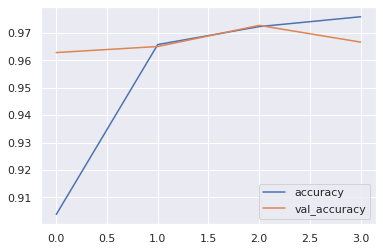

In [125]:
metrics = pd.DataFrame(model2.history.history)
metrics[['accuracy', 'val_accuracy']].plot()

In [126]:
model2.evaluate(X_test, y_cat_test, verbose = 0)

[0.10249948501586914, 0.9666000008583069]

This result was a failure because it couldn't get **98% accuracy** 😞 however just by removing one `BatchNormalization` layer we further decreased parameters **from 3418 to 3130**.